<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/ModelSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model selection using cross Validation score and GridSearchCV concepts we have done so far.**

Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

Classification models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Data collection

In [4]:
sonar = pd.read_csv('/content/drive/MyDrive/Colab_python/sonar data.csv',header=None)

# checking
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Data Pre-processing

In [5]:
# Handling Missing values
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
sonar.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


* nothing is null in this dataset

In [7]:
# Handling Imbalanced State
sonar.value_counts(60)

,count
60,
M,111
R,97


* let's check the balanced state for this

In [8]:
# M - Mine | R - Rock

rock = sonar[60] == 'R'
mine = sonar[60] == 'M'

# percentage

rock_percent = rock.sum() / sonar.shape[0]
mine_percent = mine.sum() / sonar.shape[0]

print(f'rock percentage in dataset is {round(rock_percent,2)}%')
print(f'mine percentage in dataset is {round(mine_percent,2)}%')

rock percentage in dataset is 0.47%
mine percentage in dataset is 0.53%


* dataset is almost in balanced state perfectly

Not focusing in basic stats , splitting features and label from dataset

In [9]:
features = sonar.drop(60,axis=1)
label = sonar[60]

print('features')
print(features)
print()
print('labels')
print(label)
print()

features
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52  

Label Encoding the label data by manual

In [10]:
label = np.where(label=='R',0,1)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Rock - 0 | Mine - 1**

Converting features and label to numpy array

In [11]:
X = np.asarray(features.values)
Y = np.asarray(label)

print('x')
print(X)
print('---------------------------------')
print('y')
print(Y)

x
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
---------------------------------
y
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Cross Validation score with default parameters**

In [12]:
# first instance of model class
cross_models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [13]:
def compare_cross_val_score(models,x,y):
    for model in models:
        score = cross_val_score(model,x,y,cv=5)
        # check score
        print(f'score of {model} is {score}')
        # average percentage
        accuracy = sum(score) / len(score)
        accuracy = accuracy* 100
        accuracy = round(accuracy,2)
        print(f'accuracy of {model} is {accuracy}%')
        print('--------------------------------------------------')

In [14]:
# function call
compare_cross_val_score(cross_models,X,Y)

score of LogisticRegression(max_iter=1000) is [0.45238095 0.76190476 0.61904762 0.82926829 0.48780488]
accuracy of LogisticRegression(max_iter=1000) is 63.01%
--------------------------------------------------
score of SVC(kernel='linear') is [0.42857143 0.73809524 0.66666667 0.82926829 0.48780488]
accuracy of SVC(kernel='linear') is 63.01%
--------------------------------------------------
score of KNeighborsClassifier() is [0.54761905 0.64285714 0.5952381  0.53658537 0.29268293]
accuracy of KNeighborsClassifier() is 52.3%
--------------------------------------------------
score of RandomForestClassifier(random_state=0) is [0.52380952 0.69047619 0.69047619 0.75609756 0.68292683]
accuracy of RandomForestClassifier(random_state=0) is 66.88%
--------------------------------------------------


**Using GridSearchCV for hyperparameter tuning**

In [15]:
# second instances for model classes
grid_models = [LogisticRegression(max_iter=1000),SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [16]:
# parameter for models
hyperparameter = {
    'log_reg':{
        'max_iter':[100,1000]
},
    'svc':{
        'C':[1,5,10,20],
        'kernel':['linear','poly','rbf','sigmoid']
},
    'knn':{
        'n_neighbors':[3,5,10]
},
    'rfc':{
        'n_estimators':[100,150,200,250,300]
},
}

In [17]:
model_keys = list(hyperparameter.keys())
hyperparameter[model_keys[0]]

{'max_iter': [100, 1000]}

In [18]:
def compare_grid_cv(models,x,y):
    i = 0
    result = []
    for model in models:
        params = hyperparameter[model_keys[i]]
        i += 1
        grid = GridSearchCV(model,params,cv=5)
        grid.fit(x,y)
        result.append({
            'model':model,
            'accuracy':grid.best_score_,
            'params':grid.best_params_
        })
    return result

In [19]:
# converting result to dataframe
result = compare_grid_cv(grid_models,X,Y)
result_df = pd.DataFrame(result)
result_df

,model,accuracy,params
0,LogisticRegression(max_iter=1000),0.630081,{'max_iter': 100}
1,SVC(),0.659350,"{'C': 10, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.527875,{'n_neighbors': 3}
3,RandomForestClassifier(random_state=0),0.697793,{'n_estimators': 300}


* so finally, we got to know what to choose as a model and it's hyperparameters for model tuning
* RandomForestClassifier with hyperparameter as n_estimators = 300

**Model Building and Tuning**

In [20]:
x_train,x_test,y_train,y_test = train_test_split(features.values,label,test_size=0.2,stratify=label,random_state=42)

In [21]:
print(features.shape,x_train.shape,x_test.shape)

(208, 60) (166, 60) (42, 60)


In [22]:
# new instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300,random_state=42)

In [23]:
# on training data
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [24]:
# prediction on seen datas
from sklearn.metrics import accuracy_score as acc

train_pred = rfc.predict(x_train)

# accuracy

train_acc = acc(train_pred,y_train)
train_acc = train_acc * 100
train_acc = round(train_acc,2)
print(f'accuracy of training data : {train_acc}%')

accuracy of training data : 100.0%


In [25]:
# prediction on unseen datas

test_pred = rfc.predict(x_test)

# accuracy

test_acc = acc(test_pred,y_test)
test_acc = test_acc * 100
test_acc = round(test_acc,2)
print(f'accuracy on testing data : {test_acc}%')

accuracy on testing data : 83.33%


* On seen data - 100% accuracy

* On unseen data - 83.33% accuracy

* So far we have done great progress, let's build predictive system....

Confusion matrix

[[16  3]
 [ 4 19]]

(42, 60)



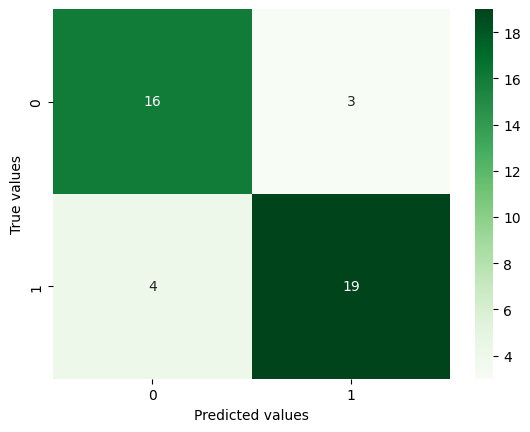

In [33]:
# confusion matrix
from sklearn.metrics import confusion_matrix
map = confusion_matrix(test_pred,y_test)
print(map)
print()
print(x_test.shape)
print()

# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(map,annot=True,fmt='d',cmap='Greens')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

* let notice, out 42 datas, 16 were predicted correctly as zeros (rock) and 19 were predicted correctly as ones (mine)
* Rest are false negatives and true negatives, those were predicted wrongly

**Predictive System**

In [27]:
# inputs

rock_inp = (0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,0.0906,0.2545,0.1464,0.1272,0.1223,0.1669,0.1424,0.1285,0.1857,0.1136,0.2069,0.0219,0.2400,0.2547,0.0240,0.1923,0.4753,0.7003,0.6825,0.6443,0.7063,0.5373,0.6601,0.8708,0.9518,0.9605,0.7712,0.6772,0.6431,0.6720,0.6035,0.5155,0.3802,0.2278,0.1522,0.0801,0.0804,0.0752,0.0566,0.0175,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068)
mine_inp = (0.0249,0.0119,0.0277,0.0760,0.1218,0.1538,0.1192,0.1229,0.2119,0.2531,0.2855,0.2961,0.3341,0.4287,0.5205,0.6087,0.7236,0.7577,0.7726,0.8098,0.8995,0.9247,0.9365,0.9853,0.9776,1.0000,0.9896,0.9076,0.7306,0.5758,0.4469,0.3719,0.2079,0.0955,0.0488,0.1406,0.2554,0.2054,0.1614,0.2232,0.1773,0.2293,0.2521,0.1464,0.0673,0.0965,0.1492,0.1128,0.0463,0.0193,0.0140,0.0027,0.0068,0.0150,0.0012,0.0133,0.0048,0.0244,0.0077,0.0074)

# tuple to matrix

rock_arr = np.asarray(rock_inp)
mine_arr = np.asarray(mine_inp)

# reshaping

rock_reshaped = rock_arr.reshape(1,-1)
mine_reshaped = mine_arr.reshape(1,-1)

# checking
print(rock_reshaped)
print()
print(mine_reshaped)

[[0.0368 0.0403 0.0317 0.0293 0.082  0.1342 0.1161 0.0663 0.0155 0.0506
  0.0906 0.2545 0.1464 0.1272 0.1223 0.1669 0.1424 0.1285 0.1857 0.1136
  0.2069 0.0219 0.24   0.2547 0.024  0.1923 0.4753 0.7003 0.6825 0.6443
  0.7063 0.5373 0.6601 0.8708 0.9518 0.9605 0.7712 0.6772 0.6431 0.672
  0.6035 0.5155 0.3802 0.2278 0.1522 0.0801 0.0804 0.0752 0.0566 0.0175
  0.0058 0.0091 0.016  0.016  0.0081 0.007  0.0135 0.0067 0.0078 0.0068]]

[[0.0249 0.0119 0.0277 0.076  0.1218 0.1538 0.1192 0.1229 0.2119 0.2531
  0.2855 0.2961 0.3341 0.4287 0.5205 0.6087 0.7236 0.7577 0.7726 0.8098
  0.8995 0.9247 0.9365 0.9853 0.9776 1.     0.9896 0.9076 0.7306 0.5758
  0.4469 0.3719 0.2079 0.0955 0.0488 0.1406 0.2554 0.2054 0.1614 0.2232
  0.1773 0.2293 0.2521 0.1464 0.0673 0.0965 0.1492 0.1128 0.0463 0.0193
  0.014  0.0027 0.0068 0.015  0.0012 0.0133 0.0048 0.0244 0.0077 0.0074]]


In [28]:
# prediction function
def make_prediction(value):
    if value[0] == 0:
        print(f'{value} : obtained sonar data is Rock')
    else:
        print(f'{value} : obtained sonar data is Mine')

In [29]:
# prediction system

rock_pred = rfc.predict(rock_reshaped)
mine_pred = rfc.predict(mine_reshaped)

# function call

make_prediction(rock_pred)
make_prediction(mine_pred)

[0] : obtained sonar data is Rock
[1] : obtained sonar data is Mine
